نقاط روی صفحه به صورت دایره دیده می‌شن.
رنگ‌ها (قرمز و آبی) نشان‌دهنده‌ی دو کلاس مختلف هستند.
محور افقی و عمودی ویژگی‌های هر داده‌اند.
🔹 هدف الگوریتم SVM در مرحله‌ی بعد اینه که یه خط بین این دو گروه بکشه تا اونا رو از هم جدا کنه.

X:
 [[ 7.06 -8.36]
 [ 5.37 -2.45]
 [ 9.5  -3.79]
 [10.49 -2.76]
 [ 6.54 -9.04]
 [ 8.08 -4.26]
 [ 6.5  -9.32]
 [ 8.98 -4.87]
 [ 6.09 -7.93]
 [ 6.78 -7.35]]

y:
 [1 0 0 0 1 0 1 0 1 1]


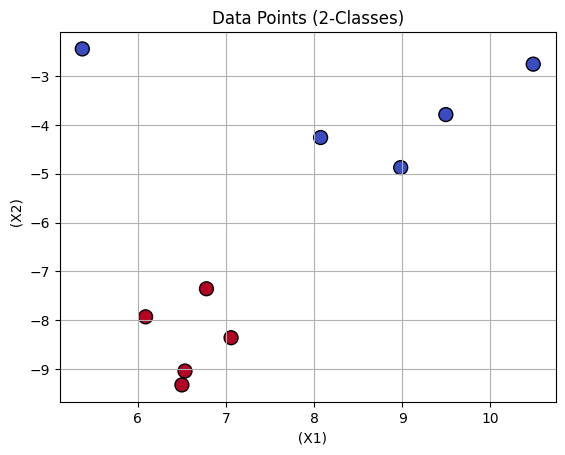

In [16]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# ساخت داده‌ی مصنوعی
X, y = datasets.make_blobs(n_samples=10, centers=2, random_state=6)

# چاپ برای بررسی
print("X:\n", np.round(X, 2))
print("\ny:\n", y)

# رسم نقاط روی نمودار
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=100, edgecolors='k')
plt.xlabel("  (X1)")
plt.ylabel("  (X2)")
plt.title("Data Points (2-Classes)")
plt.grid(True)
plt.show()


کد کامل با 
SVM و رسم خط جداکننده

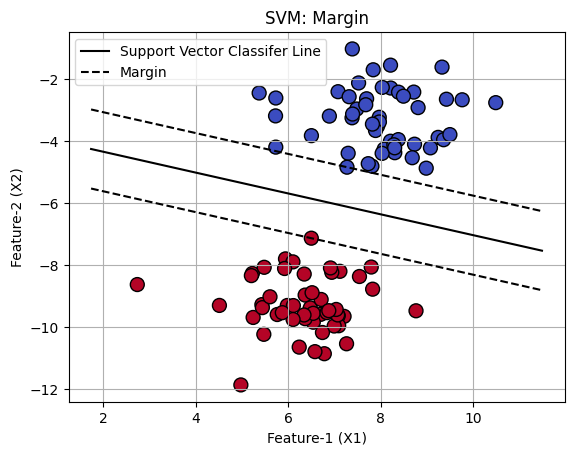

Support Vectors:
 [[ 7.27059007 -4.84225716]
 [ 6.49868019 -7.13530714]]


In [17]:
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# ساخت داده‌ی مصنوعی
# دو تا کلاس
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# ساخت مدل SVM با کرنل خطی
model = SVC(kernel='linear')
model.fit(X, y)

# گرفتن وزن‌ها و bias خط جداکننده
w = model.coef_[0]
b = model.intercept_[0]

# رسم نقاط
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=100, edgecolors='k')

# رسم خط جداکننده: w1*x + w2*y + b = 0 → y = -(w1*x + b)/w2
x_plot = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100)
y_plot = -(w[0]*x_plot + b)/w[1]
plt.plot(x_plot, y_plot, 'k-', label="Support Vector Classifer Line")

# رسم margin ها: y = -(w1*x + b ± 1)/w2
margin = 1/np.linalg.norm(w)
y_margin_up = -(w[0]*x_plot + b - 1)/w[1]
y_margin_down = -(w[0]*x_plot + b + 1)/w[1]
plt.plot(x_plot, y_margin_up, 'k--', label="Margin")
plt.plot(x_plot, y_margin_down, 'k--')

plt.xlabel("Feature-1 (X1)")
plt.ylabel("Feature-2 (X2)")
plt.title("SVM: Margin")
plt.legend()
plt.grid(True)
plt.show()

# چاپ Support Vectors
print("Support Vectors:\n", model.support_vectors_)


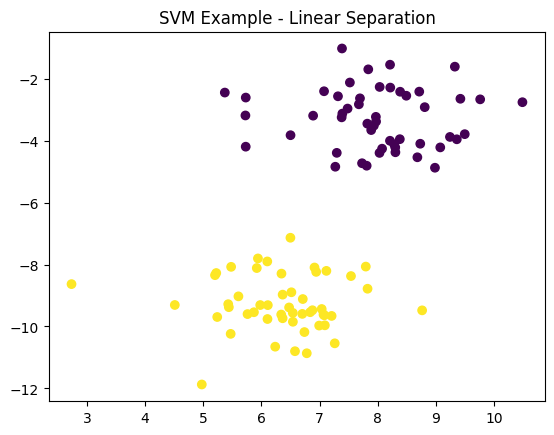

In [18]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# داده‌ی نمونه
# n_samples   = 10  یعنی ۱۰ تا نقطه (نمونه‌ی داده)
# centers     = 2   یعنی دو گروه یا دو کلاس داریم
# random_state= 6   فقط برای تکرارپذیر بودن داده‌هاست (یعنی هر بار یکسان تولید شن)
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# چاپ داده‌ها
# print("X (ویژگی‌ها):")
# print(np.round(X, 2))   # با گرد کردن برای خوانایی بهتر
# print("\ny (برچسب‌ها):")
# print(y)

# تقسیم داده‌ها
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# مدل SVM
# kernel: (linear, rbf, poly, sigmoid, ...)  نوع تابع برای جدا کردن داده‌ها 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# نمایش داده‌ها
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("SVM Example - Linear Separation")
plt.show()


بیایم یه انیمیشن مرحله‌ای ساده بسازیم تا ببینی 
SVM 
چطور خط جداکننده و مارجین رو پیدا می‌کنه.

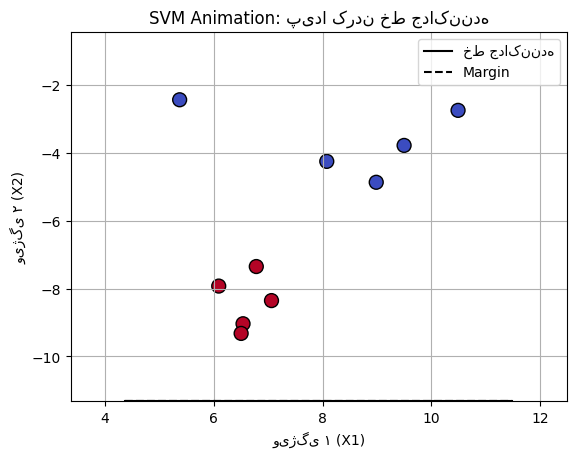

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn import datasets
from sklearn.svm import SVC

# داده‌های مصنوعی
X, y = datasets.make_blobs(n_samples=10, centers=2, random_state=6)

# مدل SVM با کرنل خطی
model = SVC(kernel='linear')
model.fit(X, y)

# پارامترهای خط
w = model.coef_[0]
b = model.intercept_[0]
x_plot = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100)
y_final = -(w[0]*x_plot + b)/w[1]
y_margin_up = -(w[0]*x_plot + b - 1)/w[1]
y_margin_down = -(w[0]*x_plot + b + 1)/w[1]

# آماده کردن شکل
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=100, edgecolors='k')
line, = ax.plot([], [], 'k-', label='خط جداکننده')
margin_up, = ax.plot([], [], 'k--', label='Margin')
margin_down, = ax.plot([], [], 'k--')
ax.set_xlim(X[:,0].min()-2, X[:,0].max()+2)
ax.set_ylim(X[:,1].min()-2, X[:,1].max()+2)
ax.set_xlabel("ویژگی ۱ (X1)")
ax.set_ylabel("ویژگی ۲ (X2)")
ax.set_title("SVM Animation: پیدا کردن خط جداکننده")
ax.legend()
ax.grid(True)

# تابع انیمیشن (حرکت مرحله‌ای خط از بالا به پایین)
def animate(i):
    alpha = i/50  # از 0 تا 1
    y = alpha*y_final + (1-alpha)*(X[:,1].min()-2)  # شروع خط از پایین نمودار
    line.set_data(x_plot, y)
    margin_up.set_data(x_plot, alpha*y_margin_up + (1-alpha)*(X[:,1].min()-2))
    margin_down.set_data(x_plot, alpha*y_margin_down + (1-alpha)*(X[:,1].min()-2))
    return line, margin_up, margin_down

ani = FuncAnimation(fig, animate, frames=51, interval=100, blit=True)
plt.show()


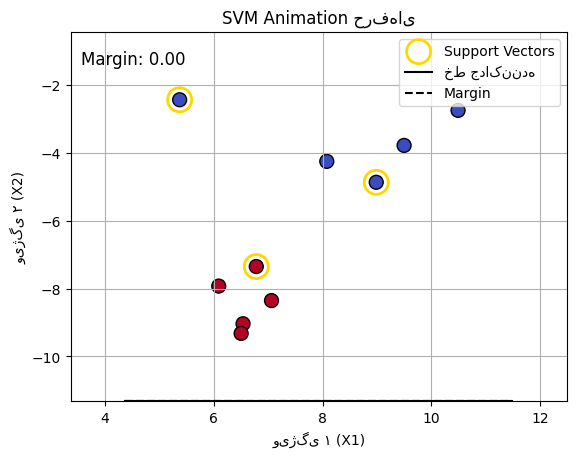

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn import datasets
from sklearn.svm import SVC

# --- ساخت داده ---
X, y = datasets.make_blobs(n_samples=10, centers=2, random_state=6)

# --- مدل SVM ---
model = SVC(kernel='linear')
model.fit(X, y)

w = model.coef_[0]
b = model.intercept_[0]

# خط جداکننده نهایی
x_plot = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100)
y_final = -(w[0]*x_plot + b)/w[1]
margin_up = -(w[0]*x_plot + b - 1)/w[1]
margin_down = -(w[0]*x_plot + b + 1)/w[1]
margin_distance = 1/np.linalg.norm(w)  # فاصله margin

support_vectors = model.support_vectors_

# --- شکل و محور ---
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=100, edgecolors='k')
sv_scatter = ax.scatter(support_vectors[:,0], support_vectors[:,1], s=300, facecolors='none', edgecolors='gold', linewidths=2, label="Support Vectors")
line, = ax.plot([], [], 'k-', label='خط جداکننده')
margin_up_line, = ax.plot([], [], 'k--', label='Margin')
margin_down_line, = ax.plot([], [], 'k--')
margin_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12, verticalalignment='top')

ax.set_xlim(X[:,0].min()-2, X[:,0].max()+2)
ax.set_ylim(X[:,1].min()-2, X[:,1].max()+2)
ax.set_xlabel("ویژگی ۱ (X1)")
ax.set_ylabel("ویژگی ۲ (X2)")
ax.set_title("SVM Animation حرفه‌ای")
ax.legend()
ax.grid(True)

# --- تابع انیمیشن ---
def animate(i):
    alpha = i/50
    y = alpha*y_final + (1-alpha)*(X[:,1].min()-2)
    line.set_data(x_plot, y)
    margin_up_line.set_data(x_plot, alpha*margin_up + (1-alpha)*(X[:,1].min()-2))
    margin_down_line.set_data(x_plot, alpha*margin_down + (1-alpha)*(X[:,1].min()-2))
    margin_text.set_text(f"Margin: {alpha*margin_distance:.2f}")
    return line, margin_up_line, margin_down_line, margin_text

ani = FuncAnimation(fig, animate, frames=51, interval=100, blit=True)
plt.show()


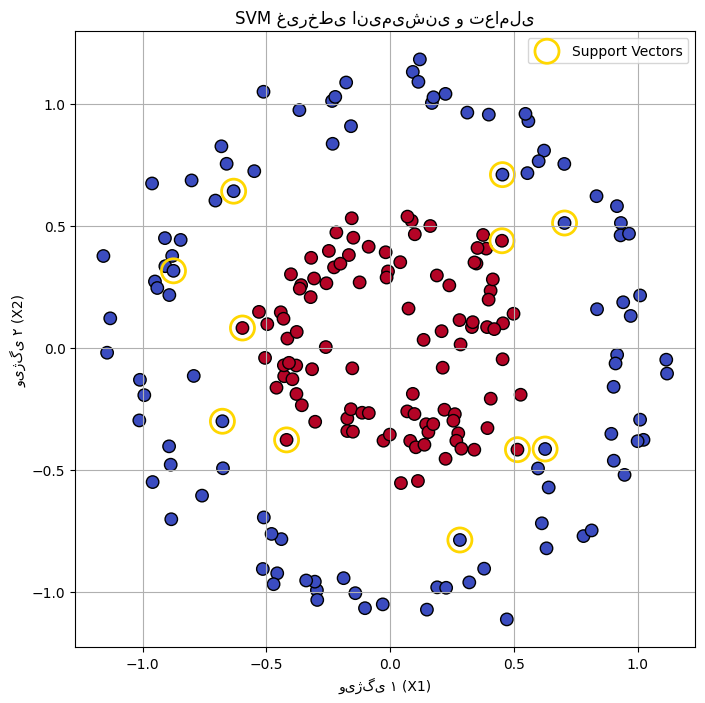

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn import datasets
from sklearn.svm import SVC

# --- داده‌های غیرخطی ---
X, y = datasets.make_circles(n_samples=200, factor=0.4, noise=0.1, random_state=42)

# --- مدل SVM ---
model = SVC(kernel='rbf', C=100, gamma=2)
model.fit(X, y)
support_vectors = model.support_vectors_

# --- شبکه برای نمایش ---
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200))
Z_final = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# --- شکل و محور ---
fig, ax = plt.subplots(figsize=(8,8))
scatter = ax.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=80, edgecolors='k')
sv_scatter = ax.scatter(support_vectors[:,0], support_vectors[:,1], s=300, facecolors='none', 
                        edgecolors='gold', linewidths=2, label="Support Vectors")
decision_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12, verticalalignment='top')
ax.set_xlabel("ویژگی ۱ (X1)")
ax.set_ylabel("ویژگی ۲ (X2)")
ax.set_title("SVM غیرخطی انیمیشنی و تعاملی")
ax.legend()
ax.grid(True)

# --- تابع برای به‌روزرسانی مقدار decision function روی موس ---
def on_mouse_move(event):
    if event.inaxes == ax:
        point = np.array([[event.xdata, event.ydata]])
        value = model.decision_function(point)[0]
        decision_text.set_text(f"Decision function: {value:.2f}")
        fig.canvas.draw_idle()

fig.canvas.mpl_connect('motion_notify_event', on_mouse_move)

# --- تابع انیمیشن ---
def animate(i):
    alpha = i/50  # 0 تا 1
    Z = Z_final * alpha
    ax.collections = ax.collections[:2]  # پاک کردن خطوط قبلی بجز نقاط و SV
    # رنگ پس‌زمینه تابع تصمیم
    ax.contourf(xx, yy, Z, levels=50, cmap='coolwarm', alpha=0.3)
    # خطوط مرز تصمیم و Margin
    ax.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)
    ax.contour(xx, yy, Z, levels=[-1,1], colors='k', linestyles='--')
    return ax.collections + [decision_text]

ani = FuncAnimation(fig, animate, frames=51, interval=100, blit=False)
plt.show()


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


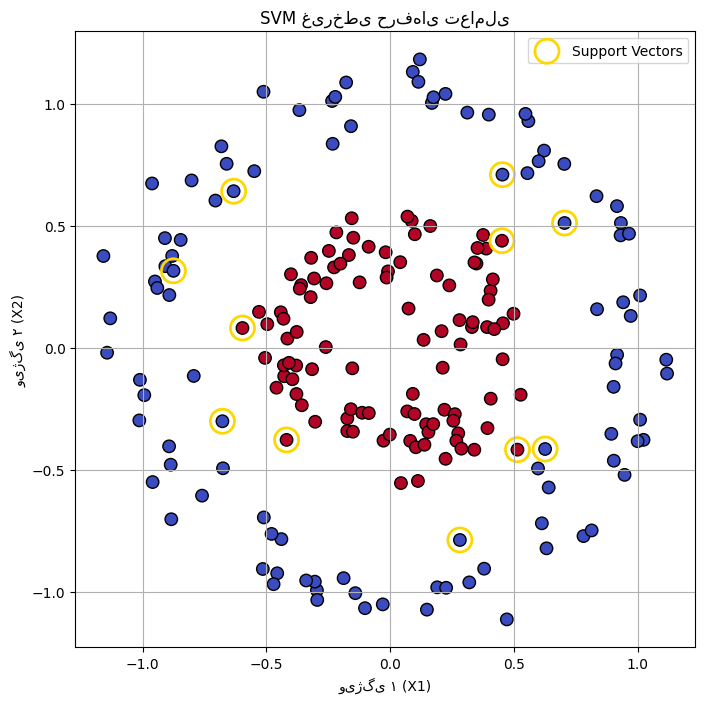

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn import datasets
from sklearn.svm import SVC

# --- داده‌های غیرخطی ---
X, y = datasets.make_circles(n_samples=200, factor=0.4, noise=0.1, random_state=42)

# --- مدل SVM ---
model = SVC(kernel='rbf', C=100, gamma=2)
model.fit(X, y)
support_vectors = model.support_vectors_

# --- شبکه برای نمایش ---
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200))
Z_final = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# --- شکل و محور ---
fig, ax = plt.subplots(figsize=(8,8))
scatter = ax.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=80, edgecolors='k')
sv_scatter = ax.scatter(support_vectors[:,0], support_vectors[:,1], s=300, facecolors='none', 
                        edgecolors='gold', linewidths=2, label="Support Vectors")

# متن برای نمایش decision function روی موس
decision_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12, verticalalignment='top')

# متن برای نمایش پیش‌بینی نمونه کلیک شده
click_text = ax.text(0.02, 0.90, '', transform=ax.transAxes, fontsize=12, verticalalignment='top')

ax.set_xlabel("ویژگی ۱ (X1)")
ax.set_ylabel("ویژگی ۲ (X2)")
ax.set_title("SVM غیرخطی حرفه‌ای تعاملی")
ax.legend()
ax.grid(True)

# --- تابع انیمیشن ---
def animate(i):
    alpha = i/50
    Z = Z_final * alpha
    ax.collections = ax.collections[:2]  # پاک کردن خطوط قبلی بجز نقاط و SV
    # رنگ پس‌زمینه decision function
    ax.contourf(xx, yy, Z, levels=50, cmap='coolwarm', alpha=0.3)
    # مرز تصمیم و Margin
    ax.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)
    ax.contour(xx, yy, Z, levels=[-1,1], colors='k', linestyles='--')
    return ax.collections + [decision_text, click_text]

ani = FuncAnimation(fig, animate, frames=51, interval=100, blit=False)

# --- رویداد موس برای نمایش decision function ---
def on_mouse_move(event):
    if event.inaxes == ax:
        point = np.array([[event.xdata, event.ydata]])
        value = model.decision_function(point)[0]
        decision_text.set_text(f"Decision function: {value:.2f}")
        fig.canvas.draw_idle()

# --- رویداد کلیک موس برای پیش‌بینی کلاس ---
def on_click(event):
    if event.inaxes == ax:
        point = np.array([[event.xdata, event.ydata]])
        pred = model.predict(point)[0]
        value = model.decision_function(point)[0]
        click_text.set_text(f"Clicked point class: {pred}, decision: {value:.2f}")
        fig.canvas.draw_idle()

fig.canvas.mpl_connect('motion_notify_event', on_mouse_move)
fig.canvas.mpl_connect('button_press_event', on_click)

plt.show()
